In [7]:
import pandas as pd
import pickle as pkl

In [9]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [27]:
lgbm_cols_to_report = ['rank_test_score','mean_test_score','param_learning_rate',
                       'param_max_depth','param_num_iterations']
rf_cols_to_report = ['rank_test_score','mean_test_score','param_bagging_fraction','param_max_depth',
                     'param_num_iterations']
                       

In [ ]:
col_to_rename_lgbm ={'rank_test_score': 'rank',
         'mean_test_score': 'AUC-ROC val',
         'param_learning_rate':'learning rate',
         'param_max_depth': 'max depth',
         'param_num_iterations': 'number of iterations'}
col_to_rename_rf ={'rank_test_score': 'rank',
         'mean_test_score': 'AUC-ROC val',
         'param_bagging_fraction':'bagging fraction',
         'param_max_depth': 'max depth',
         'param_num_iterations': 'number of iterations'}

In [53]:
def load_grid_search_results(model_version, boosting_type='gdbt'):

    if boosting_type == 'gdbt':
        if model_version == 'extra_features':
            results = pd.read_csv(
                'experiments/extra_Features_model/lgb_extra_features_grid_search_results.csv')    
        elif model_version == 'date_features':
            results = pd.read_csv(
                 'experiments/date_features_model/lgb_date_features_grid_search_results.csv')
            
        elif model_version == 'combined_features':
            results = pd.read_csv(
                 'experiments/combined/lgb_comb_features_grid_search_results.csv')
            
    elif boosting_type == 'rf':
        if model_version == 'extra_features':
            results = pd.read_csv(
                'experiments/extra_Features_model/rf_extra_features_grid_search_results.csv')
        elif model_version == 'date_features':
            results = pd.read_csv(
                'experiments/date_features_model/rf_date_features_grid_search_results.csv')
        elif model_version == 'combined_features':
            results = pd.read_csv(
                'experiments/combined/rf_comb_features_grid_search_results.csv')
    return results


In [58]:
def report_top_fits(model_version, boosting_type='gdbt', N=10):
    
    results = load_grid_search_results(model_version, boosting_type) 
   
            
    results.sort_values(by='rank_test_score',inplace=True)
    
    cols_to_report = ['rank_test_score','mean_test_score'] 
        
    if boosting_type == 'gdbt':
        results_to_report = results[cols_to_report+['param_learning_rate',
                                                    'param_max_depth',
                                                    'param_num_iterations']]
    elif boosting_type == 'rf':
        results_to_report  =  results[cols_to_report +['param_bagging_fraction',
                                                         'param_max_depth',
                                                         'param_num_iterations']]
    
    
    return results_to_report.head(N)

### Extra features

#### Top 10 gradient boosting

In [59]:
report_top_fits('extra_features','gdbt')

,rank_test_score,mean_test_score,param_learning_rate,param_max_depth,param_num_iterations
49,1,0.866424,0.05,30,300
23,2,0.866316,0.10,30,200
44,3,0.866237,0.05,15,300
22,4,0.866189,0.10,30,150
24,5,0.866012,0.10,30,300
48,6,0.866003,0.05,30,200
18,7,0.865866,0.10,15,200
43,8,0.865812,0.05,15,200
17,9,0.865787,0.10,15,150
39,10,0.865762,0.05,10,300


#### Gradient boosting champion

In [61]:
with open(r"experiments/extra_Features_model/lgbm_extra_features_optimized.pkl", "rb") as input_file:
    lgbm_opt = pkl.load(input_file)

#### Top 10 Random Forest

In [60]:
report_top_fits('extra_features','rf')

,rank_test_score,mean_test_score,param_bagging_fraction,param_max_depth,param_num_iterations
22,1,0.842278,0.5,30,150
17,1,0.842278,0.5,15,150
16,3,0.842261,0.5,15,100
21,3,0.842261,0.5,30,100
18,5,0.842166,0.5,15,200
23,5,0.842166,0.5,30,200
19,7,0.842114,0.5,15,300
24,7,0.842114,0.5,30,300
15,9,0.841906,0.5,15,50
20,9,0.841906,0.5,30,50


#### Random Forest champion

In [46]:
with open(r"experiments/extra_Features_model/rf_extra_features_optimized.pkl", "rb") as input_file:
    rf_opt = pkl.load(input_file)

## Date Features

#### Top 10 Gradient Boosting 

In [47]:
report_top_fits('date_features','gdbt')

,rank_test_score,mean_test_score,param_learning_rate,param_max_depth,param_num_iterations
44,1,0.874336,0.05,15,300
14,2,0.874254,0.10,10,300
9,3,0.874240,0.10,7,300
49,4,0.874189,0.05,30,300
13,5,0.874173,0.10,10,200
18,6,0.874070,0.10,15,200
17,7,0.874031,0.10,15,150
39,8,0.874029,0.05,10,300
12,9,0.874009,0.10,10,150
8,10,0.873923,0.10,7,200


#### Top 10 Random Forest 

In [48]:
report_top_fits('date_features','rf')

,rank_test_score,mean_test_score,param_bagging_fraction,param_max_depth,param_num_iterations
23,1,0.847703,0.5,30,200
18,1,0.847703,0.5,15,200
24,3,0.847681,0.5,30,300
19,3,0.847681,0.5,15,300
21,5,0.847651,0.5,30,100
16,5,0.847651,0.5,15,100
22,7,0.847648,0.5,30,150
17,7,0.847648,0.5,15,150
11,9,0.847478,0.5,10,100
20,10,0.847459,0.5,30,50


## Combined model

#### Top 10 gradient boosting

In [49]:
report_top_fits('combined_features','gdbt')

,rank_test_score,mean_test_score,param_learning_rate,param_max_depth,param_num_iterations
44,1,0.874540,0.05,15,300
49,2,0.874407,0.05,30,300
48,3,0.874132,0.05,30,200
39,4,0.874100,0.05,10,300
43,5,0.873988,0.05,15,200
17,6,0.873970,0.10,15,150
18,7,0.873816,0.10,15,200
13,8,0.873686,0.10,10,200
21,9,0.873636,0.10,30,100
23,10,0.873626,0.10,30,200


#### Top 10 Random Forest

In [50]:
report_top_fits('combined_features','rf')

,rank_test_score,mean_test_score,param_bagging_fraction,param_max_depth,param_num_iterations
13,1,0.851200,0.5,10,200
18,2,0.851181,0.5,15,200
23,2,0.851181,0.5,30,200
19,4,0.851155,0.5,15,300
24,5,0.851154,0.5,30,300
17,6,0.851122,0.5,15,150
22,6,0.851122,0.5,30,150
14,8,0.851119,0.5,10,300
12,9,0.851078,0.5,10,150
21,10,0.850989,0.5,30,100


### Hyperparameters analysis

In [131]:
from numpy import mean
from matplotlib import pyplot as plt

In [92]:
data = []
for model_version in ['combined_features','date_features','extra_features']:
    for boosting_type in ['gdbt','rf']:
        results = load_grid_search_results(model_version, boosting_type)
        results['ensemble'] = boosting_type
        results['model_iteration'] = model_version
        data.append(results)
    

In [93]:
df = pd.concat(data)

In [94]:
df.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_num_iterations,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,ensemble,model_iteration,param_bagging_fraction
0,0,7.669797,0.098167,0.171450,0.003134,0.1,3,50,0.857845,0.858460,0.843967,0.853424,0.006692,70,gdbt,combined_features,NaN
1,1,12.779375,0.199668,0.275357,0.014563,0.1,3,100,0.864902,0.865925,0.849876,0.860234,0.007336,61,gdbt,combined_features,NaN
2,2,18.217926,0.419568,0.441390,0.004025,0.1,3,150,0.868111,0.868930,0.852654,0.863231,0.007487,55,gdbt,combined_features,NaN
3,3,867.182555,587.254193,1.182351,0.648894,0.1,3,200,0.870274,0.870647,0.854824,0.865249,0.007373,48,gdbt,combined_features,NaN
4,4,35.762364,1.973076,0.756565,0.053136,0.1,3,300,0.872477,0.872611,0.856504,0.867197,0.007562,40,gdbt,combined_features,NaN


In [199]:
data = pd.concat([comb_grid_search_lgbm,date_grid_search_lgbm,extra_grid_search_lgbm])

In [71]:
df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_num_iterations,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,ensemble,param_bagging_fraction
0,0,7.669797,0.098167,0.171450,0.003134,0.1,3,50,0.857845,0.858460,0.843967,0.853424,0.006692,70,gdbt,NaN
1,1,12.779375,0.199668,0.275357,0.014563,0.1,3,100,0.864902,0.865925,0.849876,0.860234,0.007336,61,gdbt,NaN
2,2,18.217926,0.419568,0.441390,0.004025,0.1,3,150,0.868111,0.868930,0.852654,0.863231,0.007487,55,gdbt,NaN
3,3,867.182555,587.254193,1.182351,0.648894,0.1,3,200,0.870274,0.870647,0.854824,0.865249,0.007373,48,gdbt,NaN
4,4,35.762364,1.973076,0.756565,0.053136,0.1,3,300,0.872477,0.872611,0.856504,0.867197,0.007562,40,gdbt,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,11.068269,0.174406,0.385005,0.005067,NaN,30,50,0.839260,0.834271,NaN,0.836766,0.002494,59,rf,0.9
96,96,18.916476,0.520579,0.776781,0.081855,NaN,30,100,0.839463,0.834970,NaN,0.837217,0.002246,54,rf,0.9
97,97,27.490841,0.144542,1.073196,0.136020,NaN,30,150,0.839499,0.834911,NaN,0.837205,0.002294,56,rf,0.9
98,98,34.073714,0.502569,1.468084,0.179293,NaN,30,200,0.839570,0.835247,NaN,0.837408,0.002162,49,rf,0.9


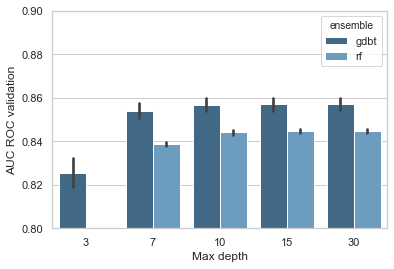

In [83]:
import seaborn as sns
from numpy import mean
from matplotlib import pyplot as plt
sns.set(style="whitegrid")
#data = comb_grid_search_lgbm
ax = sns.barplot(x="param_max_depth", y="mean_test_score",hue='ensemble', data=df, 
                 estimator=mean,palette="Blues_d")
ax.set(xlabel='Max depth', ylabel='AUC ROC validation')
plt.ylim(0.80,0.90)
plt.show()


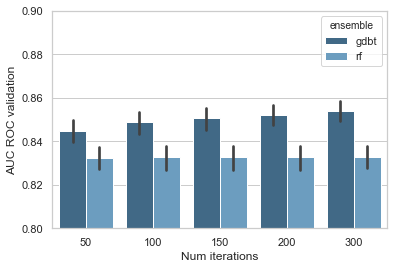

In [84]:
sns.set(style="whitegrid")
#data = comb_grid_search_lgbm
ax = sns.barplot(x="param_num_iterations", y="mean_test_score", hue='ensemble',
                 data=df, estimator=mean,palette="Blues_d")
ax.set(xlabel='Num iterations', ylabel='AUC ROC validation')
plt.ylim(0.8,0.9)
plt.show()

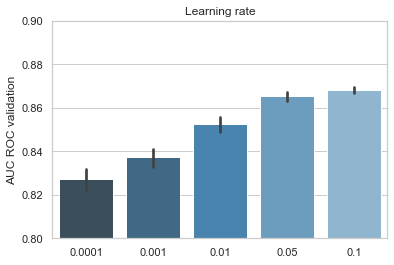

In [85]:
sns.set(style="whitegrid")
#data = comb_grid_search_lgbm
ax = sns.barplot(x="param_learning_rate", y="mean_test_score", #hue='ensemble'
                 data=df, 
                 estimator=mean,palette="Blues_d")
ax.set(xlabel='', ylabel='AUC ROC validation', title='Learning rate')
plt.ylim(0.80,0.9)
plt.show()

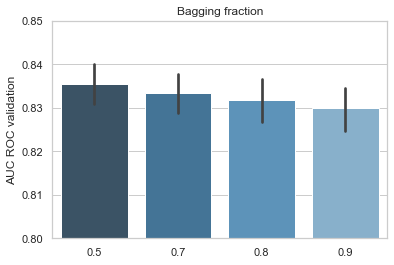

In [86]:
sns.set(style="whitegrid")
#data = comb_grid_search_lgbm
ax = sns.barplot(x="param_bagging_fraction", y="mean_test_score", #hue='ensemble'
                 data=df, 
                 estimator=mean,palette="Blues_d")
ax.set(xlabel='', ylabel='AUC ROC validation', title='Bagging fraction')
plt.ylim(0.80,0.85)
plt.show()

(0, 300)

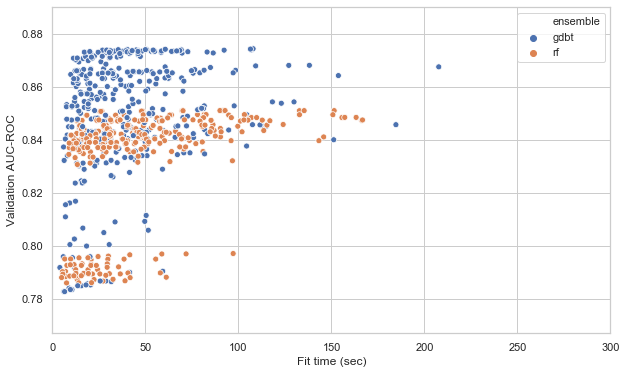

In [91]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="mean_fit_time", y="mean_test_score", hue="ensemble",
                     data=df)
ax.set(xlabel='Fit time (sec)', ylabel='Validation AUC-ROC')
plt.xlim(0,300)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)

(0, 300)

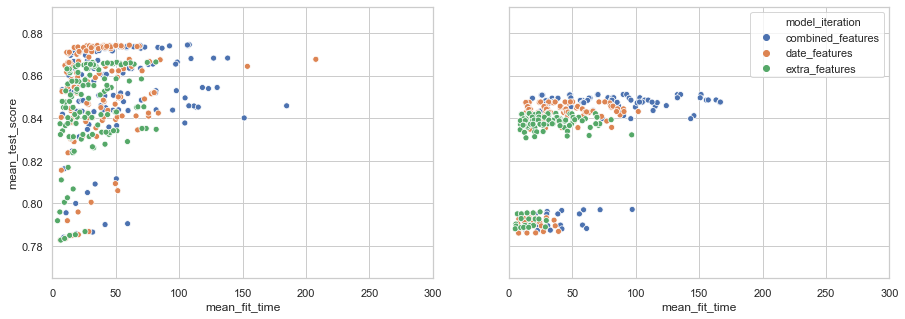

In [123]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
sns.scatterplot(x="mean_fit_time", y="mean_test_score", hue="model_iteration",
                     data=df[df.ensemble == 'gdbt'],ax=ax1,legend=False)
ax1.set_xlim(0,300)
sns.scatterplot(x="mean_fit_time", y="mean_test_score", hue="model_iteration",
                     data=df[df.ensemble == 'rf'], ax=ax2)
ax2.set_xlim(0,300)

#handles, labels = ax1.get_legend_handles_labels()
#f.legend(handles, labels, loc='upper center')


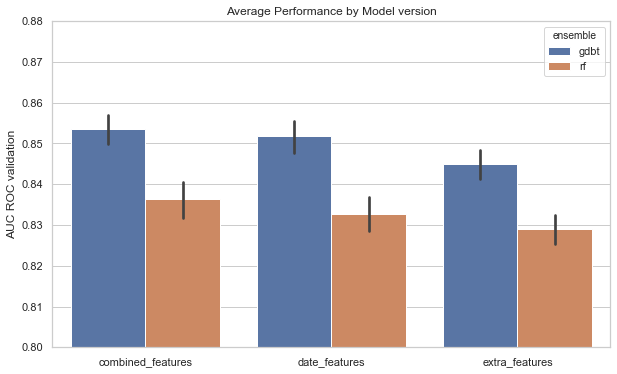

In [143]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x="model_iteration", y="mean_test_score", hue='ensemble',
                 data=df, 
                 estimator=mean)
ax.set(xlabel='', ylabel='AUC ROC validation', title='Average Performance by Model version')
plt.ylim(0.80,0.88)
plt.show()

### Load models

### Gradient boosting champion

In [148]:
with open(r"experiments/combined/lgb_comb_features_optimized.pkl", "rb") as input_file:
    model = pkl.load(input_file)

In [145]:
import lightgbm as lgbm

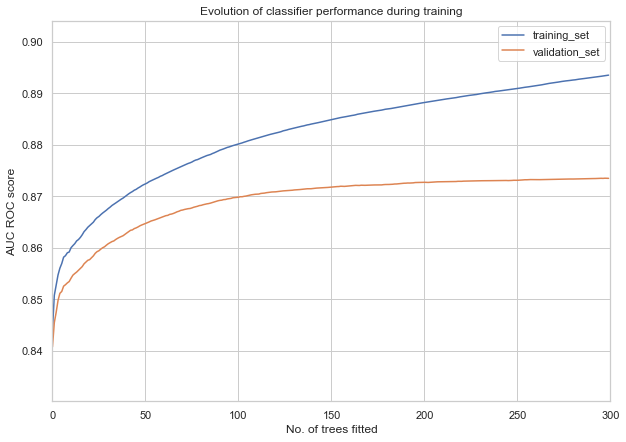

In [149]:
lgbm.plot_metric(model.classifier.evals_result, metric='auc',figsize=(10,7),
                ylabel='AUC ROC score', 
                 xlabel='No. of trees fitted',
                 title='Evolution of classifier performance during training')

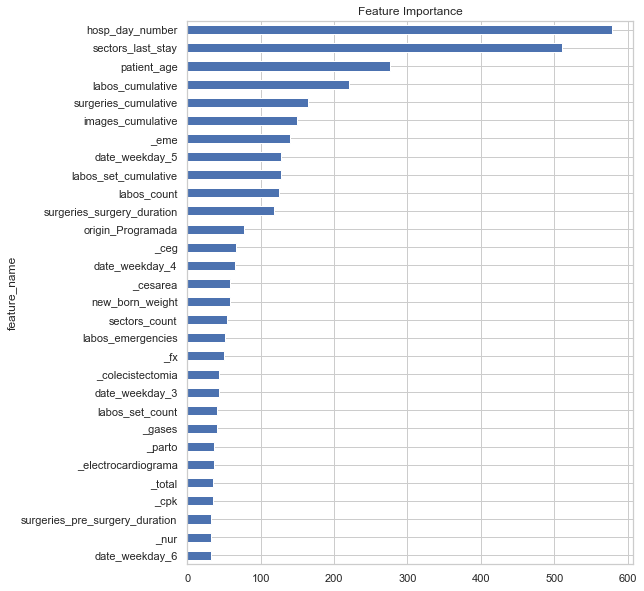

In [150]:
model.plot_feature_importance()

In [152]:
booster = model.classifier.lgbm_classifier
tree_plot = lgbm.create_tree_digraph(booster,1,
                                     show_info=[ 'internal_value', 'internal_count', 
                                              'leaf_count', 'data_percentage'],format='png')

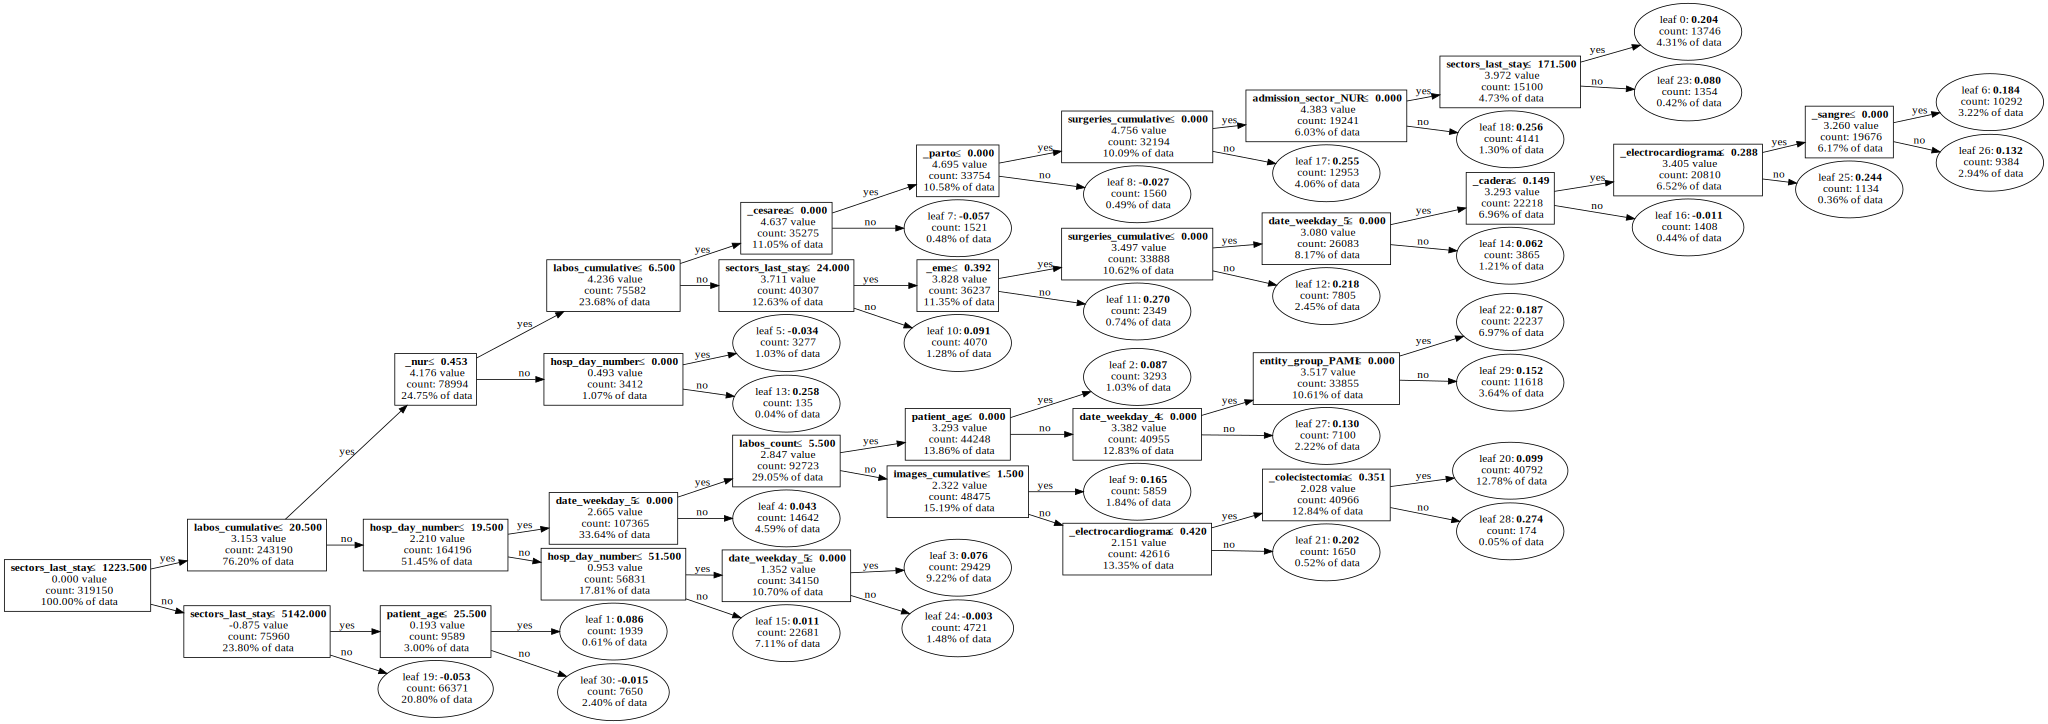

In [153]:
tree_plot

In [155]:
from thesis_lib.modelling.data import *
data = Data().load('data/hospital_dataset')

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


In [158]:
data.train.X.columns

Index(['admission_id', 'date', 'hosp_day_number', 'images_count',
       'images_cumulative', 'images_emergencies', 'images_requester_roles',
       'images_requester_roles_count', 'images_requesters',
       'images_requesters_count', 'images_studies_names', 'images_study_types',
       'images_study_types_count', 'labos_count', 'labos_cumulative',
       'labos_emergencies', 'labos_requester_roles',
       'labos_requester_roles_count', 'labos_requesters',
       'labos_requesters_count', 'labos_set_count', 'labos_set_cumulative',
       'labos_studies_names', 'patient_id', 'sector_stay', 'sectors_count',
       'sectors_last_sector', 'sectors_last_stay', 'sectors_names',
       'surgeries_actual', 'surgeries_anesthesia_types',
       'surgeries_bact_positive', 'surgeries_count', 'surgeries_cumulative',
       'surgeries_injury_condition', 'surgeries_post_surgery_condition',
       'surgeries_post_surgery_duration', 'surgeries_pre_surgery_duration',
       'surgeries_prep_duration', 

In [164]:
data.train.X[['admission_id','admission_date','date','sector_stay','sectors_last_sector','sectors_last_stay']].sort_values(by=['admission_id','date'])

,admission_id,admission_date,date,sector_stay,sectors_last_sector,sectors_last_stay
157988,466470-1,2017-01-01,2017-01-01,"353.0,10.0",T16,10.0
157989,466470-1,2017-01-01,2017-01-02,,T16,10.0
157990,466470-1,2017-01-01,2017-01-03,,T16,10.0
462869,466471-4,2017-01-01,2017-01-01,"278.0,1711.0",UCO,1711.0
462870,466471-4,2017-01-01,2017-01-02,2003.0,T15,2003.0
...,...,...,...,...,...,...
283373,523149-6,2018-11-10,2018-11-10,162.0,EME,162.0
155187,523150-0,2018-11-10,2018-11-10,151.0,EME,151.0
369167,523151-3,2018-11-10,2018-11-10,1313.0,EME,1313.0
81665,523152-6,2018-11-10,2018-11-10,96.0,EME,96.0


### random forest champion

In [265]:
with open(r"experiments/combined/rf_comb_features_optimized.pkl", "rb") as input_file:
    rf = pkl.load(input_file)

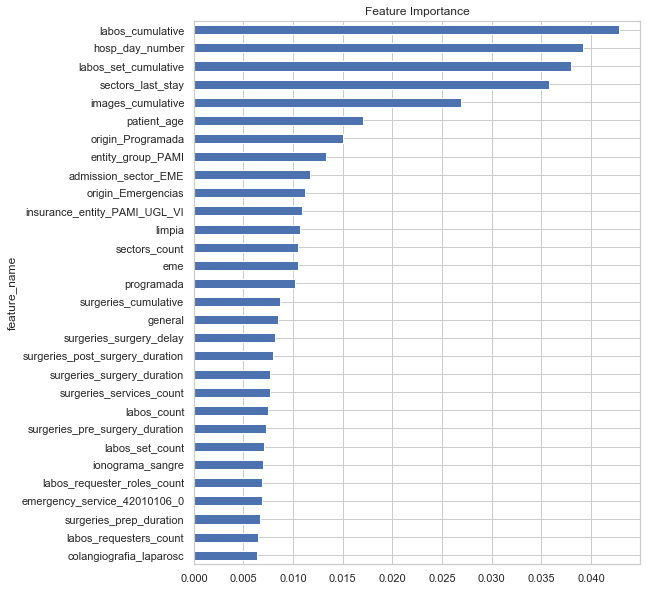

In [266]:
rf.plot_feature_importance()

In [ ]:
booster = lgbm_extra_features.classifier.lgbm_classifier
lgbm.plot_split_value_histogram(booster, feature='hosp_day_number')
lgbm.plot_split_value_histogram(booster, feature='patient_age')

In [ ]:
gbm.plot_metric(lgbm_extra_features.classifier.evals_result, metric='auc',figsize=(10,7),
                ylabel='AUC ROC score', xlabel='No. of trees fitted', title='Evolution of classifier performance during training')

In [ ]:
tree_plot = lgbm.create_tree_digraph(booster,1,show_info=[ 'internal_value', 'internal_count', 
                                              'leaf_count', 'data_percentage'],format='png')
tree_plot.view('tree_plot')

In [ ]:
#lgbm.create_tree_digraph(booster,99)